## Importing Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("./titanic/train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.dropna(subset=['Embarked'], inplace=True)

In [5]:
X = data.drop(['Survived'], axis = 1)
y = data.Survived

## Preprocessing

#### Removing extra columns

In [6]:
X.drop(['Name', 'Ticket'], axis = 1, inplace=True)
X.drop(['PassengerId'], axis = 1, inplace=True)

In [7]:
X['Family'] = X.SibSp + X.Parch
X.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [8]:
X.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
0,3,male,22.0,7.2500,NaN,S,1
1,1,female,38.0,71.2833,C85,C,1
2,3,female,26.0,7.9250,NaN,S,0
3,1,female,35.0,53.1000,C123,S,1
4,3,male,35.0,8.0500,NaN,S,0


In [9]:
X.tail()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
886,2,male,27.0,13.00,NaN,S,0
887,1,female,19.0,30.00,B42,S,0
888,3,female,NaN,23.45,NaN,S,3
889,1,male,26.0,30.00,C148,C,0
890,3,male,32.0,7.75,NaN,Q,0


In [10]:
X.reset_index(drop=True, inplace=True)

In [11]:
X.tail()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
884,2,male,27.0,13.00,NaN,S,0
885,1,female,19.0,30.00,B42,S,0
886,3,female,NaN,23.45,NaN,S,3
887,1,male,26.0,30.00,C148,C,0
888,3,male,32.0,7.75,NaN,Q,0


#### Encoding 'Sex' column

In [12]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
X.Sex = encoder.fit_transform(X.Sex)

In [13]:
X.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
0,3,1,22.0,7.2500,NaN,S,1
1,1,0,38.0,71.2833,C85,C,1
2,3,0,26.0,7.9250,NaN,S,0
3,1,0,35.0,53.1000,C123,S,1
4,3,1,35.0,8.0500,NaN,S,0


#### Encoding 'Cabin' column

In [14]:
X.Cabin = X.Cabin.fillna(0)

In [15]:
X.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
0,3,1,22.0,7.2500,0,S,1
1,1,0,38.0,71.2833,C85,C,1
2,3,0,26.0,7.9250,0,S,0
3,1,0,35.0,53.1000,C123,S,1
4,3,1,35.0,8.0500,0,S,0


In [16]:
def change_cabin(x):
    if x != 0:
        return 1
    else:
        return 0

In [17]:
X.Cabin = X.Cabin.apply(change_cabin)

In [18]:
X.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
0,3,1,22.0,7.2500,0,S,1
1,1,0,38.0,71.2833,1,C,1
2,3,0,26.0,7.9250,0,S,0
3,1,0,35.0,53.1000,1,S,1
4,3,1,35.0,8.0500,0,S,0


In [19]:
X.tail()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
884,2,1,27.0,13.00,0,S,0
885,1,0,19.0,30.00,1,S,0
886,3,0,NaN,23.45,0,S,3
887,1,1,26.0,30.00,1,C,0
888,3,1,32.0,7.75,0,Q,0


In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 7 columns):
Pclass      889 non-null int64
Sex         889 non-null int32
Age         712 non-null float64
Fare        889 non-null float64
Cabin       889 non-null int64
Embarked    889 non-null object
Family      889 non-null int64
dtypes: float64(2), int32(1), int64(3), object(1)
memory usage: 45.3+ KB


#### Encoding 'Age', 'Family' and 'Fare' column

In [21]:
X_num = X[['Age', 'Fare', 'Family']]

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer

In [23]:
num_pipeline = Pipeline([
    ('imputer', Imputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

e:\python37\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [24]:
X_num_preprocessed = num_pipeline.fit_transform(X_num)

In [25]:
X_num_preprocessed

array([[-0.56367407, -0.50023975,  0.05785331],
       [ 0.66921696,  0.78894661,  0.05785331],
       [-0.25545131, -0.48664993, -0.5618044 ],
       ...,
       [-0.10133993, -0.17408416,  1.29716872],
       [-0.25545131, -0.0422126 , -0.5618044 ],
       [ 0.20688282, -0.49017322, -0.5618044 ]])

In [26]:
X_age_fare = pd.DataFrame(X_num_preprocessed, columns=['Age', 'Fare', 'Family'])

In [27]:
X_age_fare.head()

,Age,Fare,Family
0,-0.563674,-0.500240,0.057853
1,0.669217,0.788947,0.057853
2,-0.255451,-0.486650,-0.561804
3,0.438050,0.422861,0.057853
4,0.438050,-0.484133,-0.561804


#### Encoding 'Pclass' column

In [28]:
X_pclass = X['Pclass']

In [29]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
X_pclass = ohe.fit_transform(X_pclass.values.reshape(-1,1))

e:\python37\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [30]:
X_pclass = X_pclass.toarray()

In [31]:
X_pclass

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [32]:
X_Pclass = pd.DataFrame(X_pclass, columns=['Pclass_1', 'Pclass_2', 'Pclass_3'])

In [33]:
X_Pclass.head()

,Pclass_1,Pclass_2,Pclass_3
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


#### Encoding 'Embarked' column

In [34]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
v = lb.fit_transform(X.Embarked)

In [35]:
v

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]])

In [36]:
X_embarked = pd.DataFrame(v, columns=['Embarked_C', 'Embarked_Q', 'Embarked_S'])

In [37]:
X_embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


#### Combining all the columns

In [38]:
X_train = pd.concat([X_Pclass, X.Sex, X_age_fare, X.Cabin, X_embarked], axis=1)

In [39]:
X_train.head()

,Pclass_1,Pclass_2,Pclass_3,Sex,Age,Fare,Family,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,1.0,1,-0.563674,-0.500240,0.057853,0,0,0,1
1,1.0,0.0,0.0,0,0.669217,0.788947,0.057853,1,1,0,0
2,0.0,0.0,1.0,0,-0.255451,-0.486650,-0.561804,0,0,0,1
3,1.0,0.0,0.0,0,0.438050,0.422861,0.057853,1,0,0,1
4,0.0,0.0,1.0,1,0.438050,-0.484133,-0.561804,0,0,0,1


In [40]:
X_train.tail()

,Pclass_1,Pclass_2,Pclass_3,Sex,Age,Fare,Family,Cabin,Embarked_C,Embarked_Q,Embarked_S
884,0.0,1.0,0.0,1,-0.178396,-0.384475,-0.561804,0,0,0,1
885,1.0,0.0,0.0,0,-0.794841,-0.042213,-0.561804,1,0,0,1
886,0.0,0.0,1.0,0,-0.101340,-0.174084,1.297169,0,0,0,1
887,1.0,0.0,0.0,1,-0.255451,-0.042213,-0.561804,1,1,0,0
888,0.0,0.0,1.0,1,0.206883,-0.490173,-0.561804,0,0,1,0


In [41]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [42]:
y.value_counts()

0    549
1    340
Name: Survived, dtype: int64

## Model

In [43]:
X_test = X_train[:190]
X_tr = X_train[190:]

y_test = y[:190]
y_tr = y[190:]

###  SGD Classifier

In [44]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_tr.to_numpy(), y_tr)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [45]:
y_pred = sgd_clf.predict(X_test)

####  Precision, Recall and F1 score

In [46]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[82, 45],
       [16, 47]], dtype=int64)

In [47]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_tr, y_tr, cv=3, scoring='accuracy')

array([0.76068376, 0.74248927, 0.75      ])

In [48]:
cross_val_score(sgd_clf, X_train, y, cv=4, scoring='accuracy')

array([0.75784753, 0.81981982, 0.73423423, 0.8018018 ])

In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [50]:
precision_score(y_test, y_pred)

0.5108695652173914

In [51]:
recall_score(y_test, y_pred)

0.746031746031746

In [52]:
f1_score(y_test, y_pred)

0.6064516129032258

### Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_tr.to_numpy(), y_tr)

e:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
y_pred = log_reg.predict(X_test)

In [55]:
confusion_matrix(y_test, y_pred)

array([[109,  18],
       [ 17,  46]], dtype=int64)

In [73]:
cross_val_score(log_reg, X_train, y, cv=3, scoring='accuracy')

e:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
e:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
e:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.81144781, 0.80067568, 0.80743243])

In [57]:
precision_score(y_test, y_pred)

0.71875

In [58]:
recall_score(y_test, y_pred)

0.7301587301587301

In [59]:
f1_score(y_test, y_pred)

0.7244094488188977

###  PCA

In [60]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2d = pca.fit_transform(X_train)

In [61]:
pca.explained_variance_ratio_

array([0.30346586, 0.2923298 ])

In [62]:
X2d

array([[-0.81163703,  0.48919517],
       [ 1.52888608, -0.57021839],
       [-0.80892265, -0.06279012],
       ...,
       [ 0.04016448,  1.11675918],
       [ 0.33697719, -0.4836416 ],
       [-0.75605297, -0.4956744 ]])

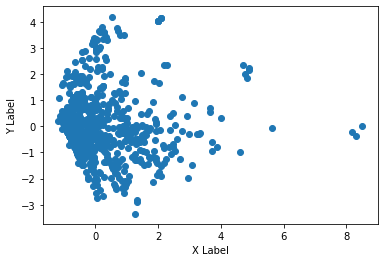

In [80]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.scatter(X2d[:,0], X2d[:, 1])
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.show()

fig = plt.figure()
ax1 = plt.axes(projection='3d')

for i in range(0,len(y)):
    xs = X2d[i, 0]
    ys = X2d[i, 1]
    zs = X2d[i, 2]
    if(y[i] == 0):
        m = '-'
        c = 'red'
    else:
        m = '^'
        c = 'green'
    ax1.scatter3D(xs, ys, zs, color=c, marker=m)
    
ax1.xlabel('X Label')
ax1.ylabel('Y Label')
ax1.zlabel('Z Label')

plt.show()

### Support Vector Machine Classifier

In [72]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='poly', degree=3, coef0=1, C= 2)
svm_clf.fit(X_tr.to_numpy(), y_tr)

e:\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=2, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [74]:
y_pred = svm_clf.predict(X_test)

In [75]:
confusion_matrix(y_test, y_pred)

array([[115,  12],
       [ 18,  45]], dtype=int64)

In [76]:
cross_val_score(log_reg, X_train, y, cv=3, scoring='accuracy')

e:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
e:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
e:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.81144781, 0.80067568, 0.80743243])

In [77]:
precision_score(y_test, y_pred)

0.7894736842105263

In [78]:
recall_score(y_test, y_pred)

0.7142857142857143

In [79]:
f1_score(y_test, y_pred)

0.7500000000000001